<a href="https://colab.research.google.com/github/yakaboskic/ENGS_108_Fall_2020/blob/master/solutions/assign_2_ENGS_108_Fall_2020_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2020 Assignment 2 Solutions**

*Due September 28, 2020 at 11:59PM on Canvas*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [1]:
''' Import Statements '''
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import math

# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/yakaboskic/ENGS_108_Fall_2020) for how to get setup. 

In [2]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
dataset_base_path = '/content/drive/My Drive/git/ENGS_108_Fall_2020/datasets'

In [3]:
#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
  synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

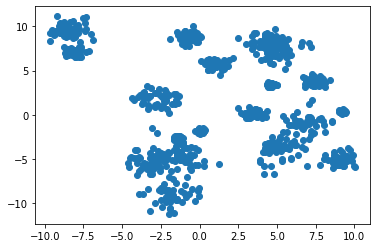

In [4]:
plt.scatter(synth_data[:,0], synth_data[:,1])

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

I would say 18 clusters.

> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

In [5]:
from sklearn.cluster import KMeans

model_init = KMeans(n_clusters=18)

>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the Bayesian information criterion (BIC) and Akaike information criterion (AIC) for each value of $k$.

In [51]:
def trainKM(k, dataset):
  ''' Using your model above, implement a function that will train your K-means
  for different values of k on your dataset and return the trained model'''
  kmModel = KMeans(n_clusters=k)
  kmModel.fit(dataset)
  return kmModel

In [52]:
def calculateBIC(model):
  ''' Using a trained model calculate the BIC for the model '''
  k = model.cluster_centers_.shape[0]
  n = len(model.labels_)
  L = model.inertia_ / n
  bic = k * math.log(n) - n * math.log(L)
  return bic

In [53]:
def calculateAIC(model):
  ''' Using a trained model calculate the AIC for the model '''
  k = model.cluster_centers_.shape[0]
  n = len(model.labels_)
  L = model.inertia_ / n
  aic = 2 * k - n * np.log(L)
  return aic

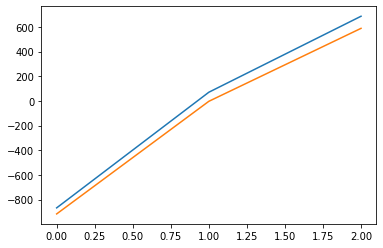

In [56]:
bics = []
aics = []
for i, k in enumerate([10,15,20]):
  model = trainKM(k, synth_data)
  bics.append(calculateBIC(model))
  aics.append(calculateAIC(model))

fig, ax = plt.subplots()
ax.plot(bics)
ax.plot(aics)

>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?


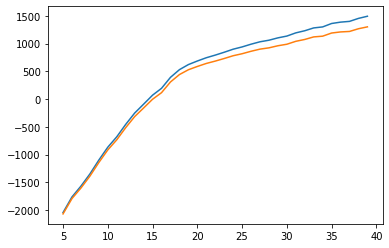

In [57]:
bics = []
aics = []
for k in range(5,40):
  model_ = trainKM(k, synth_data)
  bics.append((k, calculateBIC(model_)))
  aics.append((k, calculateAIC(model_)))

bic_np = np.array(bics)
aic_np = np.array(aics)
fig, ax = plt.subplots()
ax.plot(bic_np[:,0], bic_np[:,1])
ax.plot(aic_np[:,0], aic_np[:,1])

Looks like optimal value is around $k=20$.



# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.* 

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

def trainKNN(k, dataset):
  ''' Implement a function that will train a k-NN
  for different values of k on your dataset and return the trained model'''
  X = dataset[0]
  y = dataset[1]
  knnModel = KNeighborsClassifier(n_neighbors=k)
  knnModel.fit(X,y)
  return knnModel

> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

In [27]:
for k in range(1,10):
  model_ = trainKNN(k, synth_train)
  print('Accuracy for k={}: {}'.format(k, model_.score(synth_valid[0], synth_valid[1])))

Accuracy for k=1: 0.9516129032258065
Accuracy for k=2: 0.9470046082949308
Accuracy for k=3: 0.9608294930875576
Accuracy for k=4: 0.9608294930875576
Accuracy for k=5: 0.956221198156682
Accuracy for k=6: 0.956221198156682
Accuracy for k=7: 0.9608294930875576
Accuracy for k=8: 0.9608294930875576
Accuracy for k=9: 0.9608294930875576


> **Part 2** Report the classification accuracy of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [30]:
model_best = trainKNN(3, synth_train)
model_best.score(synth_test[0], synth_test[1])

0.9709677419354839

# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [32]:
print('Number in Training: {}\nNumber in Validation: {}\nNumber in Testing: {}'.format(
    red_train[0].shape[0],
    red_valid[0].shape[0],
    red_test[0].shape[0]
))

Number in Training: 895
Number in Validation: 224
Number in Testing: 480


>> **(b)** How many features are available for each datapoint?

In [33]:
print('Number of features: {}'.format(red_train[0].shape[1]))

Number of features: 11


>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [35]:
red_train_df[['alcohol', 'pH']].mean()

alcohol    10.397952
pH          3.309542
dtype: float64

> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [37]:
from sklearn.tree import DecisionTreeClassifier

def trainDT(dataset, max_depth=None):
  ''' Implement a function that will train a decision tree model
  on your dataset and return the trained model'''
  
  dtModel = DecisionTreeClassifier(max_depth=max_depth)
  dtModel.fit(dataset[0], dataset[1])

  return dtModel

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

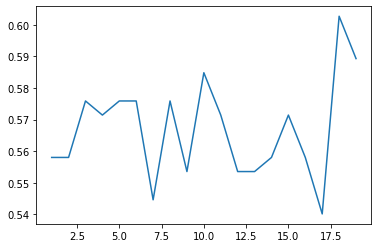

In [47]:
res = []
for max_depth_ in range(1, 20):
  model_ = trainDT(red_train, max_depth_)
  res.append((max_depth_, model_.score(red_valid[0], red_valid[1])))

res = np.array(res)

plt.plot(res[:,0], res[:,1])

>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

Since the maximum depth hyperparameter does not seem to help accuracy convergence, lets pick the least model complexity option and choose $max\_depth=1$

In [50]:
model_best = trainDT(red_train, max_depth=1)
model_best.score(red_test[0], red_test[1])

0.5625